In [20]:
import random
import numpy
import matplotlib.pyplot as plt
import pickle

import warnings
warnings.filterwarnings('ignore')


In [24]:
def outlierCleaner(predictions, ages, net_worths):
    """
        clean away the 10% of points that have the largest
        residual errors (different between the prediction
        and the actual net worth)
        return a list of tuples named cleaned_data where
        each tuple is of the form (age, net_worth, error)
    """

    cleaned_data = []

    ### your code goes here
    error = list( (net_worths - predictions)**2 )

    cleaned_data = zip(ages, net_worths, error)
    cleaned_data = sorted(cleaned_data, key = lambda tup: tup[2])
    cleaned_data = cleaned_data[:80]

    return cleaned_data

In [25]:
original = "C:\\Users\\NGSi\\ud120\\outliers\\practice_outliers_ages.pkl"
destination = "C:\\Users\\NGSi\\ud120\\outliers\\practice_outliers_ages_unix.pkl"
content = ''
outsize = 0
with open(original, 'rb') as infile:
    content = infile.read()
with open(destination, 'wb') as output:
    for line in content.splitlines():
        outsize += len(line) + 1
        output.write(line + str.encode('\n'))

print("Done. Saved %s bytes." % (len(content)-outsize))

Done. Saved 100 bytes.


In [26]:
original1= "C:\\Users\\NGSi\\ud120\\outliers\\practice_outliers_net_worths.pkl"
destination1= "C:\\Users\\NGSi\\ud120\\outliers\\practice_outliers_net_worths_unix.pkl"
content = ''
outsize = 0
with open(original1,'rb') as infile:
    content = infile.read()
with open(destination1,'wb') as output:
    for line in content.splitlines():
        outsize += len(line) + 1
        output.write(line + str.encode('\n'))

print("Done. Saved %s bytes." % (len(content)-outsize))

Done. Saved 100 bytes.


Coeff:  [[5.07793064]]
Intercept:  [25.21002155]
Score:  0.4898725961751499
Score:  0.8782624703664675


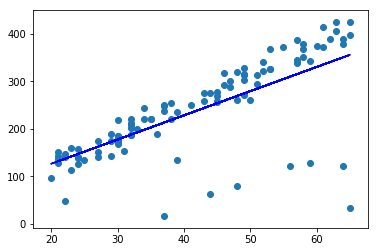

In [28]:

### load up some practice data with outliers in it
ages = pickle.load( open("C:\\Users\\NGSi\\ud120\\outliers\\practice_outliers_ages_unix.pkl", "rb") )
net_worths = pickle.load( open("C:\\Users\\NGSi\\ud120\\outliers\\practice_outliers_net_worths_unix.pkl", "rb") )



### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like

from sklearn.linear_model import LinearRegression


reg = LinearRegression()
reg.fit(ages_train, net_worths_train)
print("Coeff: ", reg.coef_) 
print("Intercept: ", reg.intercept_) 
print("Score: ", reg.score(ages_train, net_worths_train))
print("Score: ", reg.score(ages_test, net_worths_test))
pred = reg.predict(ages_test)


try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()


### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print("your regression object doesn't exist, or isn't name reg")
    print("can't make predictions to use in identifying outliers")





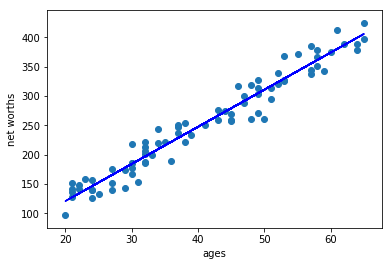

************AFTER REMOVING OUTLIERS*************
Coeff:  [[6.32006691]]
Intercept:  [-5.32173018]
Score:  0.41356442151468853
Score:  0.9824700510044744


In [30]:

### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print("you don't seem to have regression imported/created,")
        print("   or else your regression object isn't named reg")
        print("   either way, only draw the scatter plot of the cleaned data")
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print("outlierCleaner() is returning an empty list, no refitting to be done")

print('************AFTER REMOVING OUTLIERS*************')

print("Coeff: ", reg.coef_) 
print("Intercept: ", reg.intercept_) 
print("Score: ", reg.score(ages_train, net_worths_train))
print("Score: ", reg.score(ages_test, net_worths_test))
